In [61]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [62]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [63]:
sales = pd.read_csv("sales-cars.csv",index_col=0,parse_dates=[0],date_parser=parser)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


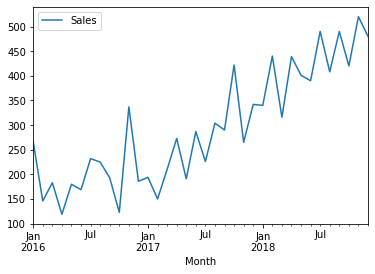

In [64]:
sales.plot()

### Checking wheather data is stationary

In [65]:
from statsmodels.graphics.tsaplots import plot_acf #Auto Correlation function plot

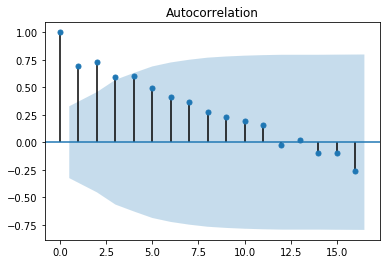

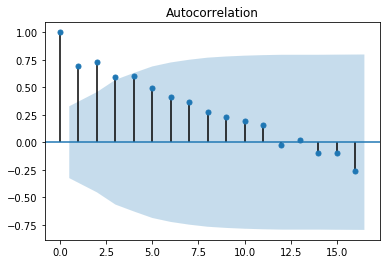

In [66]:
plot_acf(sales) # Correaltion with same series with Time lag

- Series is not correlated

### Convrting series to stationary

In [67]:
sales_diff = sales.diff(periods=1)
# Integrated of order 1, denoted by d(d for difference). Parameter of "I" in ARIMA model

In [68]:
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [69]:
sales_diff = sales_diff[1:]
sales_diff

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


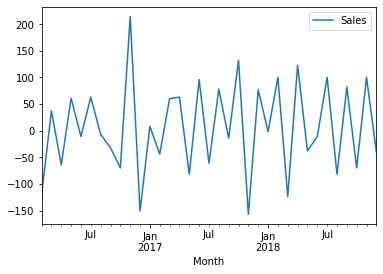

In [70]:
sales_diff.plot()

- Series is stationary now

## Train Test Split

In [71]:
X = sales.values

In [72]:
train = X[0:27]
test = X[26:]

In [73]:
print(train.size,test.size)

27 10


## Auto Regressive Model

In [74]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [75]:
predict = model_ar_fit.predict(start=26,end=36)

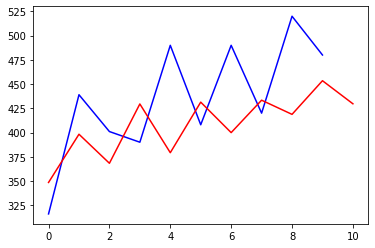

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(test,color='blue')
plt.plot(predict,color='red')

## ARIMA(p,d,q)

- p: periods taken for autoregressive model
- d: order of Integration, Integrated Order, how many times difference has been taken
- q: periods takne for moving average model

In [94]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(9,2,0))
model_arima_fit = model_arima.fit()

In [95]:
print(model_arima_fit.aic)

297.16198600285685


In [96]:
predictions =  model_arima_fit.forecast(steps=10)
predictions

(array([396.08264467, 355.94920247, 413.13867202, 374.53621453,
        447.0215783 , 378.65681831, 406.4797206 , 411.46300718,
        476.0168042 , 415.47761919]),
 array([ 51.33751484,  51.38120489,  59.60574937,  63.58127839,
         88.47521212,  97.48843303, 112.95240125, 126.21999469,
        143.21123149, 159.84031984]),
 array([[295.46296453, 496.70232482],
        [255.24389141, 456.65451353],
        [296.31354999, 529.96379406],
        [249.91919878, 499.15323027],
        [273.61334902, 620.42980759],
        [187.58300065, 569.73063596],
        [185.09708219, 627.86235902],
        [164.07636344, 658.84965091],
        [195.3279483 , 756.7056601 ],
        [102.19634902, 728.75888936]]))

In [97]:
predictions = predictions[0]
predictions

array([396.08264467, 355.94920247, 413.13867202, 374.53621453,
       447.0215783 , 378.65681831, 406.4797206 , 411.46300718,
       476.0168042 , 415.47761919])

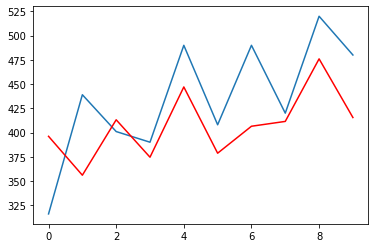

In [98]:
plt.plot(test)
plt.plot(predictions,color='red')

In [99]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [100]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809385551
(0, 0, 2) 315.25060028760385
(0, 0, 3) nan
(0, 0, 4) 310.1669328578939
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841541066672
(0, 1, 2) 296.3229226907685
(0, 1, 3) 298.3120211738931
(0, 1, 4) 300.33939756178984
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019462764249
(0, 2, 2) 290.3983548532388
(0, 2, 3) 292.9858924022638
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.04871745172943
(1, 0, 2) 310.979064222424
(1, 1, 0) 298.8325442271941
(1, 1, 1) 297.12565112584997
(1, 1, 2) 299.4716667062646
(1, 1, 3) 301.2851180947814
(1, 1, 4) 299.9787323970392
(1, 2, 0) 306.53077675711666
(1, 2, 3) 290.3253394043607
(2, 0, 0) 310.99695736299554
(2, 0, 1) 338.9782649536662
(2, 1, 0) 300.20895612401296
(2, 1, 1) 297.9999930167345
(2, 1, 2) 298.55054281302534
(2, 1, 3) 302.87208242329416
(2, 2, 0) 306.29758564320736
(3, 0, 0) 312.9838587418842
(3, 0, 1) 335.45138647731653
(3, 1, 0) 294.8543584218633
(3, 1, 1) 295.9979353418389
(3, 1, 2) 292.668623869